In [642]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [643]:
cd

C:\Users\glisi


In [644]:
cd \Users\glisi\Desktop\MakeAthon

C:\Users\glisi\Desktop\MakeAthon


In [645]:
df = pd.read_csv('modellMitScore.csv', sep = ';')

In [646]:
df.head()

,Alter,Zivilstand,Säule 3a,lebensversicherung,pensionskasse,totalVermoegen,totalLohn,schaetzungObjekt,score
0,64,68,100000,0,109368.55690,372218.1055,68040.0000,5.079846e+05,75
1,72,51,130000,45000,207181.98360,638091.8683,109200.0000,7.126644e+05,85
2,82,63,130000,0,80878.81724,517075.4024,68040.0000,1.593039e+06,50
3,30,51,20000,0,200101.56730,557973.2439,171759.3893,1.088717e+06,75
4,87,51,130000,0,0.00000,418718.7791,109200.0000,5.413073e+05,90


In [647]:
df.shape

(1000, 9)

In [648]:
df.columns

Index(['Alter', 'Zivilstand', 'Säule 3a', 'lebensversicherung',
       'pensionskasse', 'totalVermoegen', 'totalLohn', 'schaetzungObjekt',
       'score'],
      dtype='object')

In [649]:
df.dtypes

Alter                   int64
Zivilstand              int64
Säule 3a                int64
lebensversicherung      int64
pensionskasse         float64
totalVermoegen        float64
totalLohn             float64
schaetzungObjekt      float64
score                   int64
dtype: object

In [650]:
df.shape

(1000, 9)

In [651]:
df['score'].value_counts()

100    189
35     129
10     103
5       83
50      79
40      67
20      48
90      41
65      33
75      31
60      31
70      30
80      22
85      20
30      20
55      20
45      19
95      17
25      16
0        2
Name: score, dtype: int64

In [652]:
df['score'].value_counts(normalize=True) 

100    0.189
35     0.129
10     0.103
5      0.083
50     0.079
40     0.067
20     0.048
90     0.041
65     0.033
75     0.031
60     0.031
70     0.030
80     0.022
85     0.020
30     0.020
55     0.020
45     0.019
95     0.017
25     0.016
0      0.002
Name: score, dtype: float64

In [653]:
from sklearn.model_selection import train_test_split
X = df.drop('score',axis=1)
y = df[['score']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=42)

In [654]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Alter               1000 non-null   int64  
 1   Zivilstand          1000 non-null   int64  
 2   Säule 3a            1000 non-null   int64  
 3   lebensversicherung  1000 non-null   int64  
 4   pensionskasse       1000 non-null   float64
 5   totalVermoegen      1000 non-null   float64
 6   totalLohn           1000 non-null   float64
 7   schaetzungObjekt    1000 non-null   float64
 8   score               1000 non-null   int64  
dtypes: float64(4), int64(5)
memory usage: 70.4 KB


In [655]:
target = list(df['score'].unique())
feature_names = list(X.columns)

In [656]:
from sklearn import tree
import graphviz

In [657]:
from sklearn.tree import DecisionTreeClassifier
clf_model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=3, min_samples_leaf=5)   
clf_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

In [658]:
y_predict = clf_model.predict(X_test)

In [659]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_test,y_predict)

0.36

In [660]:
df.shape

(1000, 9)

In [661]:
target = list(df['score'].unique())
feature_names = list(X.columns)

In [662]:
from sklearn.tree import export_text
r = export_text(clf_model, feature_names=feature_names)
print(r)

|--- schaetzungObjekt <= 405957.56
|   |--- totalVermoegen <= 130660.19
|   |   |--- schaetzungObjekt <= 109289.35
|   |   |   |--- class: 100
|   |   |--- schaetzungObjekt >  109289.35
|   |   |   |--- class: 95
|   |--- totalVermoegen >  130660.19
|   |   |--- schaetzungObjekt <= 381674.89
|   |   |   |--- class: 100
|   |   |--- schaetzungObjekt >  381674.89
|   |   |   |--- class: 100
|--- schaetzungObjekt >  405957.56
|   |--- totalVermoegen <= 154229.76
|   |   |--- schaetzungObjekt <= 1421077.69
|   |   |   |--- class: 40
|   |   |--- schaetzungObjekt >  1421077.69
|   |   |   |--- class: 35
|   |--- totalVermoegen >  154229.76
|   |   |--- schaetzungObjekt <= 1071424.75
|   |   |   |--- class: 75
|   |   |--- schaetzungObjekt >  1071424.75
|   |   |   |--- class: 5



In [663]:
from sklearn.model_selection import train_test_split
X = df.drop('score',axis=1)
y = df[['score']]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7,random_state=42)

In [664]:
target = list(df['score'].unique())
feature_names = list(X.columns)

In [665]:
from sklearn import tree
import graphviz

In [666]:
from sklearn.tree import DecisionTreeClassifier
clf_model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=20, min_samples_leaf=5, ccp_alpha=0.0015)   
clf_model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0015, max_depth=20, min_samples_leaf=5,
                       random_state=42)

In [667]:
y_predict = clf_model.predict(X_test)

In [668]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_test,y_predict)

0.6333333333333333

<AxesSubplot:>

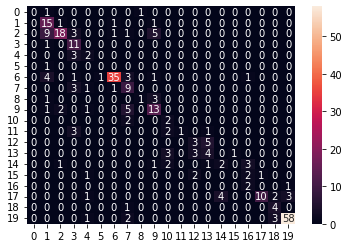

In [669]:
cfm = confusion_matrix(y_test, y_predict)
sns.heatmap(cfm, annot=True)

In [670]:
target = list(df['score'].unique())
feature_names = list(X.columns)

In [671]:
from sklearn.tree import export_text
r = export_text(clf_model, feature_names=feature_names)
print(r)

|--- schaetzungObjekt <= 405957.56
|   |--- totalVermoegen <= 130660.19
|   |   |--- schaetzungObjekt <= 109289.35
|   |   |   |--- class: 100
|   |   |--- schaetzungObjekt >  109289.35
|   |   |   |--- schaetzungObjekt <= 377213.48
|   |   |   |   |--- Alter <= 65.50
|   |   |   |   |   |--- totalVermoegen <= 90883.04
|   |   |   |   |   |   |--- class: 25
|   |   |   |   |   |--- totalVermoegen >  90883.04
|   |   |   |   |   |   |--- class: 95
|   |   |   |   |--- Alter >  65.50
|   |   |   |   |   |--- class: 40
|   |   |   |--- schaetzungObjekt >  377213.48
|   |   |   |   |--- class: 75
|   |--- totalVermoegen >  130660.19
|   |   |--- class: 100
|--- schaetzungObjekt >  405957.56
|   |--- totalVermoegen <= 154229.76
|   |   |--- schaetzungObjekt <= 1421077.69
|   |   |   |--- totalVermoegen <= 100665.95
|   |   |   |   |--- totalLohn <= 53040.00
|   |   |   |   |   |--- schaetzungObjekt <= 682928.78
|   |   |   |   |   |   |--- class: 40
|   |   |   |   |   |--- schaetzungObjekt

In [672]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [673]:
pred_cv = model.predict(X_test)
accuracy_score(y_test,pred_cv)

0.5866666666666667

In [674]:
from sklearn.linear_model import LinearRegression
model_reg = LinearRegression()
reg = model_reg.fit(X_train, y_train)
reg.coef_

array([[ 1.26976117e-01,  1.03363423e-01, -4.49593938e-05,
        -9.92581048e-06, -5.41262274e-06,  4.05277073e-05,
         1.46313506e-04, -4.16991078e-05]])

In [675]:
X = df.drop('score',1)
y = df.score

In [676]:
X = pd.get_dummies(X)
train=pd.get_dummies(df)
test=pd.get_dummies(df)

In [677]:
eb = pd.read_csv('revisedModelWithEligibility.csv', sep = ';')
eb.head()

,Alter,Zivilstand,Säule 3a,lebensversicherung,pensionskasse,totalVermoegen,totalLohn,schaetzungObjekt,Eligible
0,64,68,100000,0,109368.55690,372218.1055,68040.0000,5.079846e+05,1
1,72,51,130000,45000,207181.98360,638091.8683,109200.0000,7.126644e+05,1
2,82,63,130000,0,80878.81724,517075.4024,68040.0000,1.593039e+06,0
3,30,51,20000,0,200101.56730,557973.2439,171759.3893,1.088717e+06,1
4,87,51,130000,0,0.00000,418718.7791,109200.0000,5.413073e+05,1


In [678]:
eb.shape

(1000, 9)

In [679]:
from sklearn.model_selection import train_test_split
X = eb.drop('Eligible',axis=1)
y = eb[['Eligible']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=42)

In [680]:
target = list(eb['Eligible'].unique())
feature_names = list(X.columns)

In [681]:
from sklearn import tree
import graphviz

In [682]:
from sklearn.tree import DecisionTreeClassifier
clf_model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=15, min_samples_leaf=5, ccp_alpha=0.0015)   
clf_model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0015, max_depth=15, min_samples_leaf=5,
                       random_state=42)

In [683]:
y_predict = clf_model.predict(X_test)

In [684]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_test,y_predict)

0.9633333333333334

In [685]:
from sklearn.tree import export_text
r = export_text(clf_model, feature_names=feature_names)
print(r)

|--- schaetzungObjekt <= 779312.59
|   |--- totalVermoegen <= 113302.62
|   |   |--- schaetzungObjekt <= 408866.58
|   |   |   |--- totalVermoegen <= 58558.31
|   |   |   |   |--- schaetzungObjekt <= 170880.79
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- schaetzungObjekt >  170880.79
|   |   |   |   |   |--- class: 0
|   |   |   |--- totalVermoegen >  58558.31
|   |   |   |   |--- class: 1
|   |   |--- schaetzungObjekt >  408866.58
|   |   |   |--- pensionskasse <= 2349.25
|   |   |   |   |--- class: 0
|   |   |   |--- pensionskasse >  2349.25
|   |   |   |   |--- class: 0
|   |--- totalVermoegen >  113302.62
|   |   |--- schaetzungObjekt <= 663806.09
|   |   |   |--- class: 1
|   |   |--- schaetzungObjekt >  663806.09
|   |   |   |--- totalVermoegen <= 146867.59
|   |   |   |   |--- class: 0
|   |   |   |--- totalVermoegen >  146867.59
|   |   |   |   |--- totalLohn <= 88620.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- totalLohn >  88620.00
|   |   |   |   |   |

<AxesSubplot:>

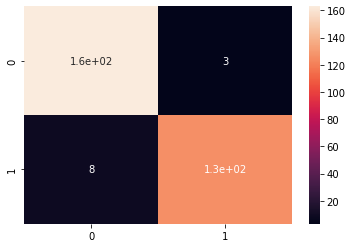

In [686]:
cfm = confusion_matrix(y_test, y_predict)
sns.heatmap(cfm, annot=True)

In [687]:
from sklearn.linear_model import LinearRegression


In [688]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [689]:
pred_cv = model.predict(X_test)
accuracy_score(y_test,pred_cv)

0.96

In [690]:
from sklearn.linear_model import LinearRegression
model_reg = LinearRegression()
reg = model_reg.fit(X_train, y_train)
reg.coef_

array([[ 1.18056742e-03,  3.44135875e-04, -3.49413125e-07,
         6.50491936e-07, -6.72610837e-07,  1.08407194e-06,
         1.86517704e-06, -6.07890621e-07]])